# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

In [17]:
library("tidyverse")

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [18]:
Wind_Turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

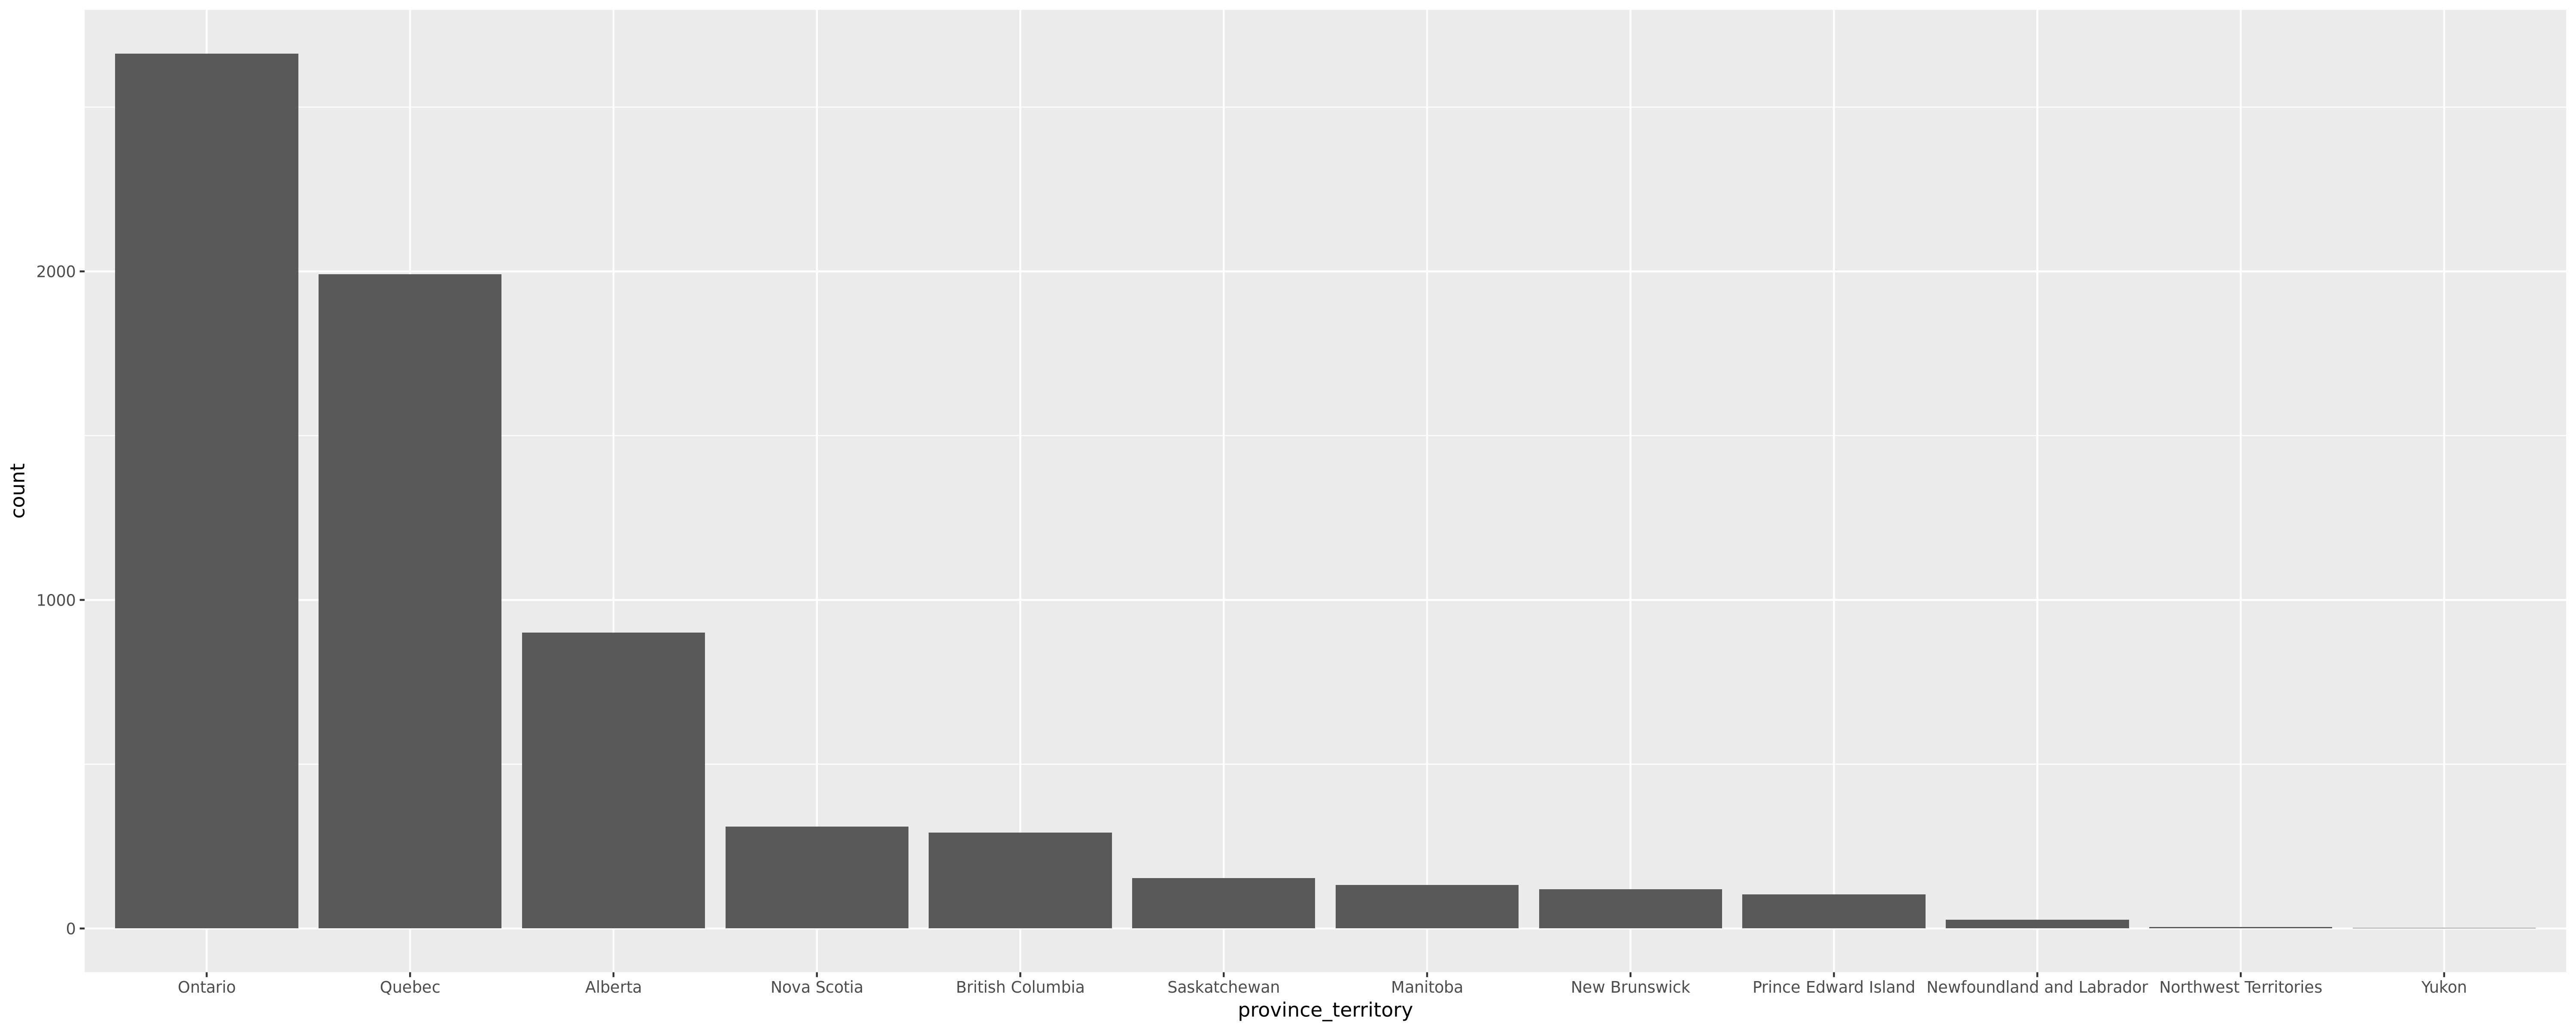

In [19]:
wind_new = Wind_Turbine |>
    mutate(province_territory = fct_infreq(province_territory))

options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 300)
ggplot(wind_new, aes(x=province_territory)) +
    geom_bar()

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

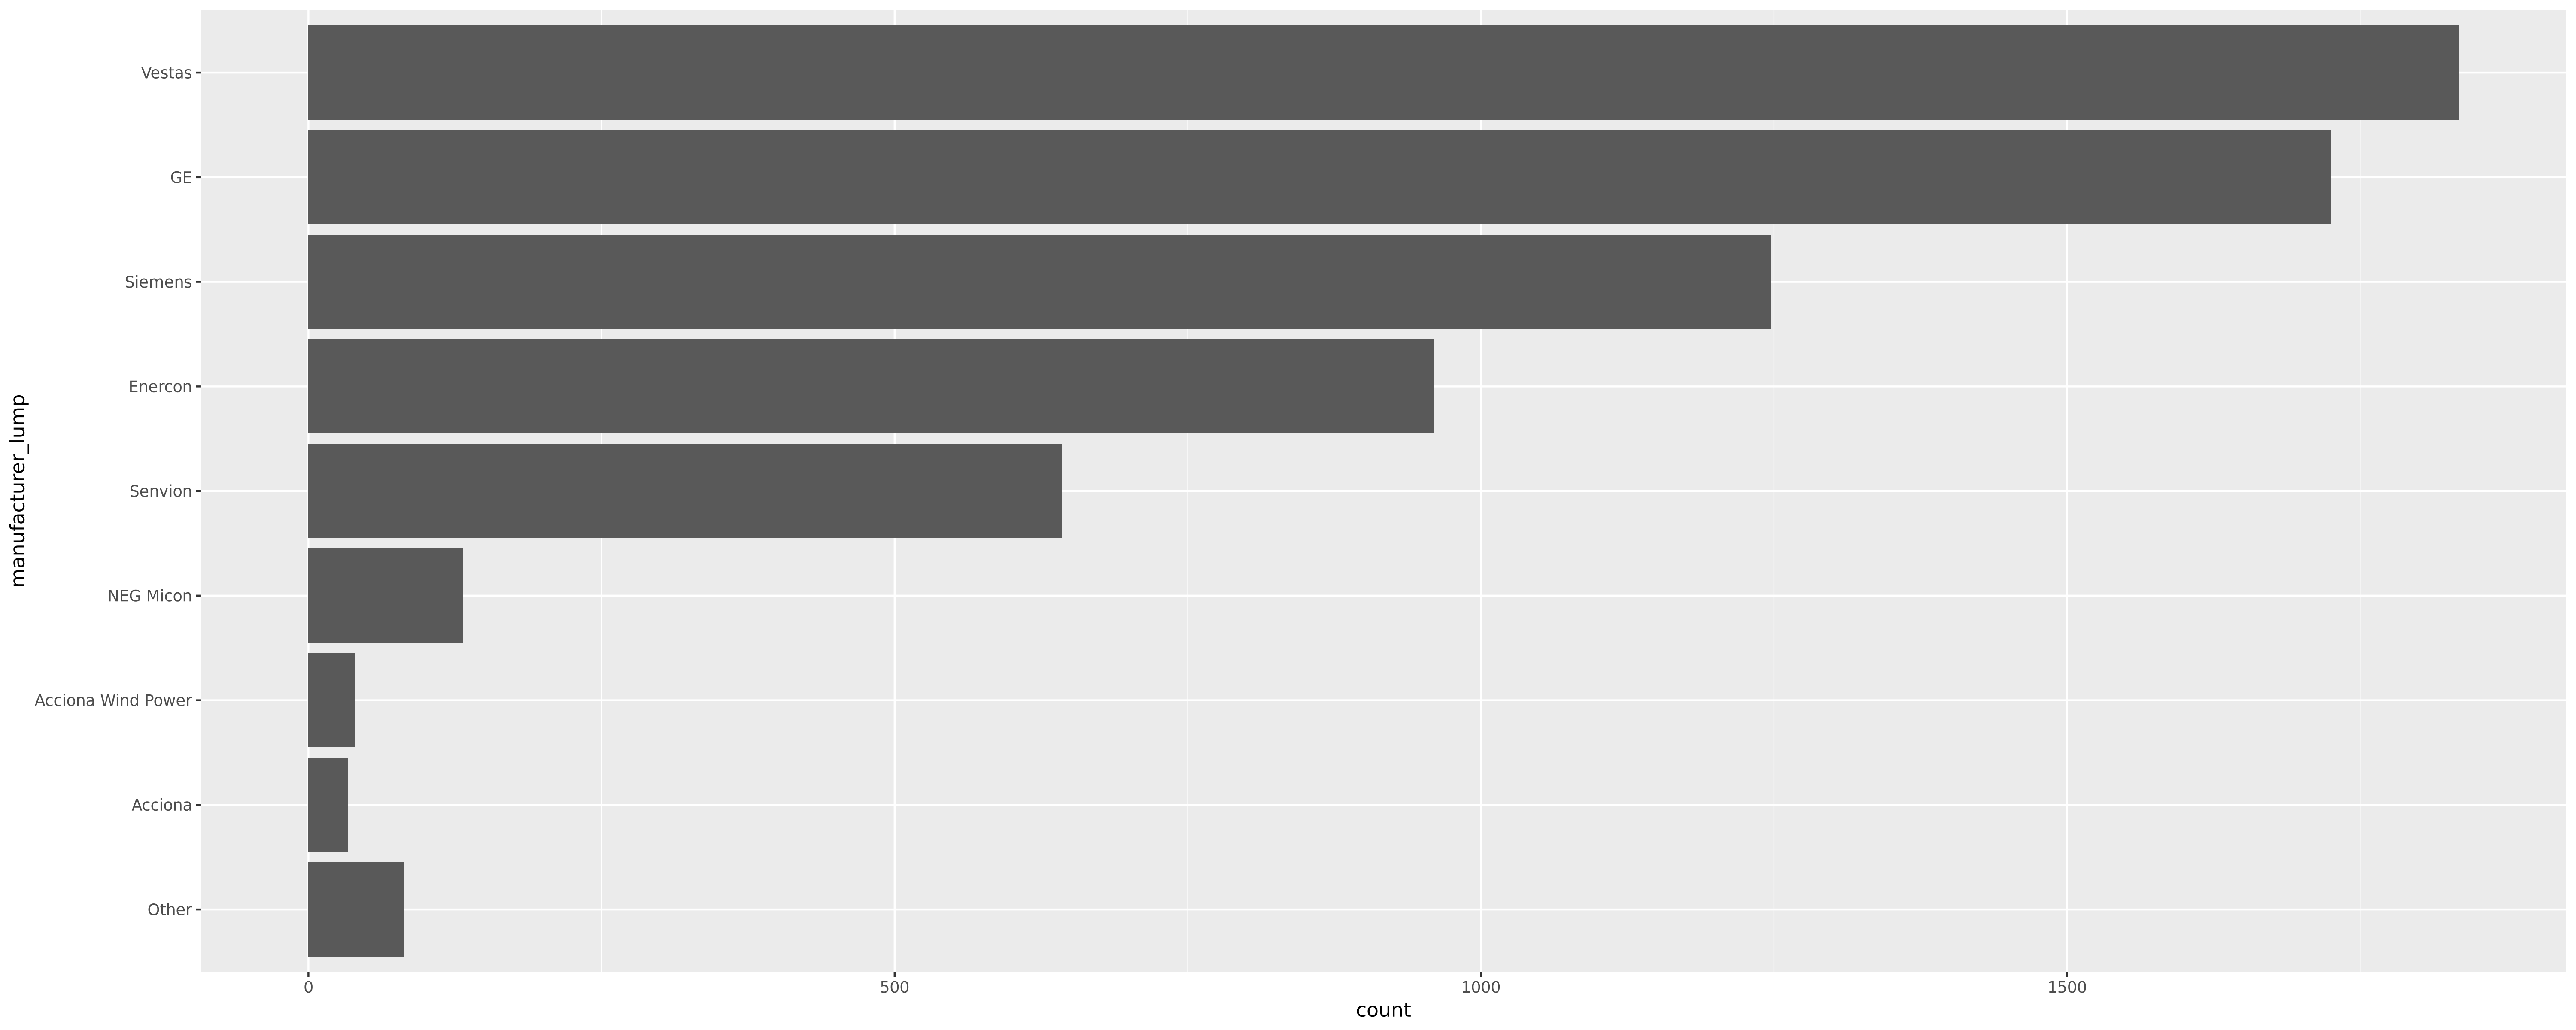

In [20]:
wind_man = Wind_Turbine |>
    mutate(manufacturer_lump = manufacturer |> 
           fct_lump(n = 8) |> fct_infreq() |>
    fct_relevel('Other', after = Inf) |>
    fct_rev())
 
ggplot(wind_man, aes(y = manufacturer_lump)) + geom_bar()

In [21]:
library("mapdata")

Now we can retrieve the "data" for a map of Canada. Run this code:

In [22]:
canada = map_data('world', region='Canada')  

canada |> head()

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-59.78760,43.93960,1,1,Canada,Sable Island
2,-59.92227,43.90391,1,2,Canada,Sable Island
3,-60.03775,43.90664,1,3,Canada,Sable Island
4,-60.11426,43.93911,1,4,Canada,Sable Island
5,-60.11748,43.95337,1,5,Canada,Sable Island
6,-59.93604,43.93960,1,6,Canada,Sable Island


Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

for the turbine data it is labeled at latitude and longitude versus the canada map data is labeled as lat and long


The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

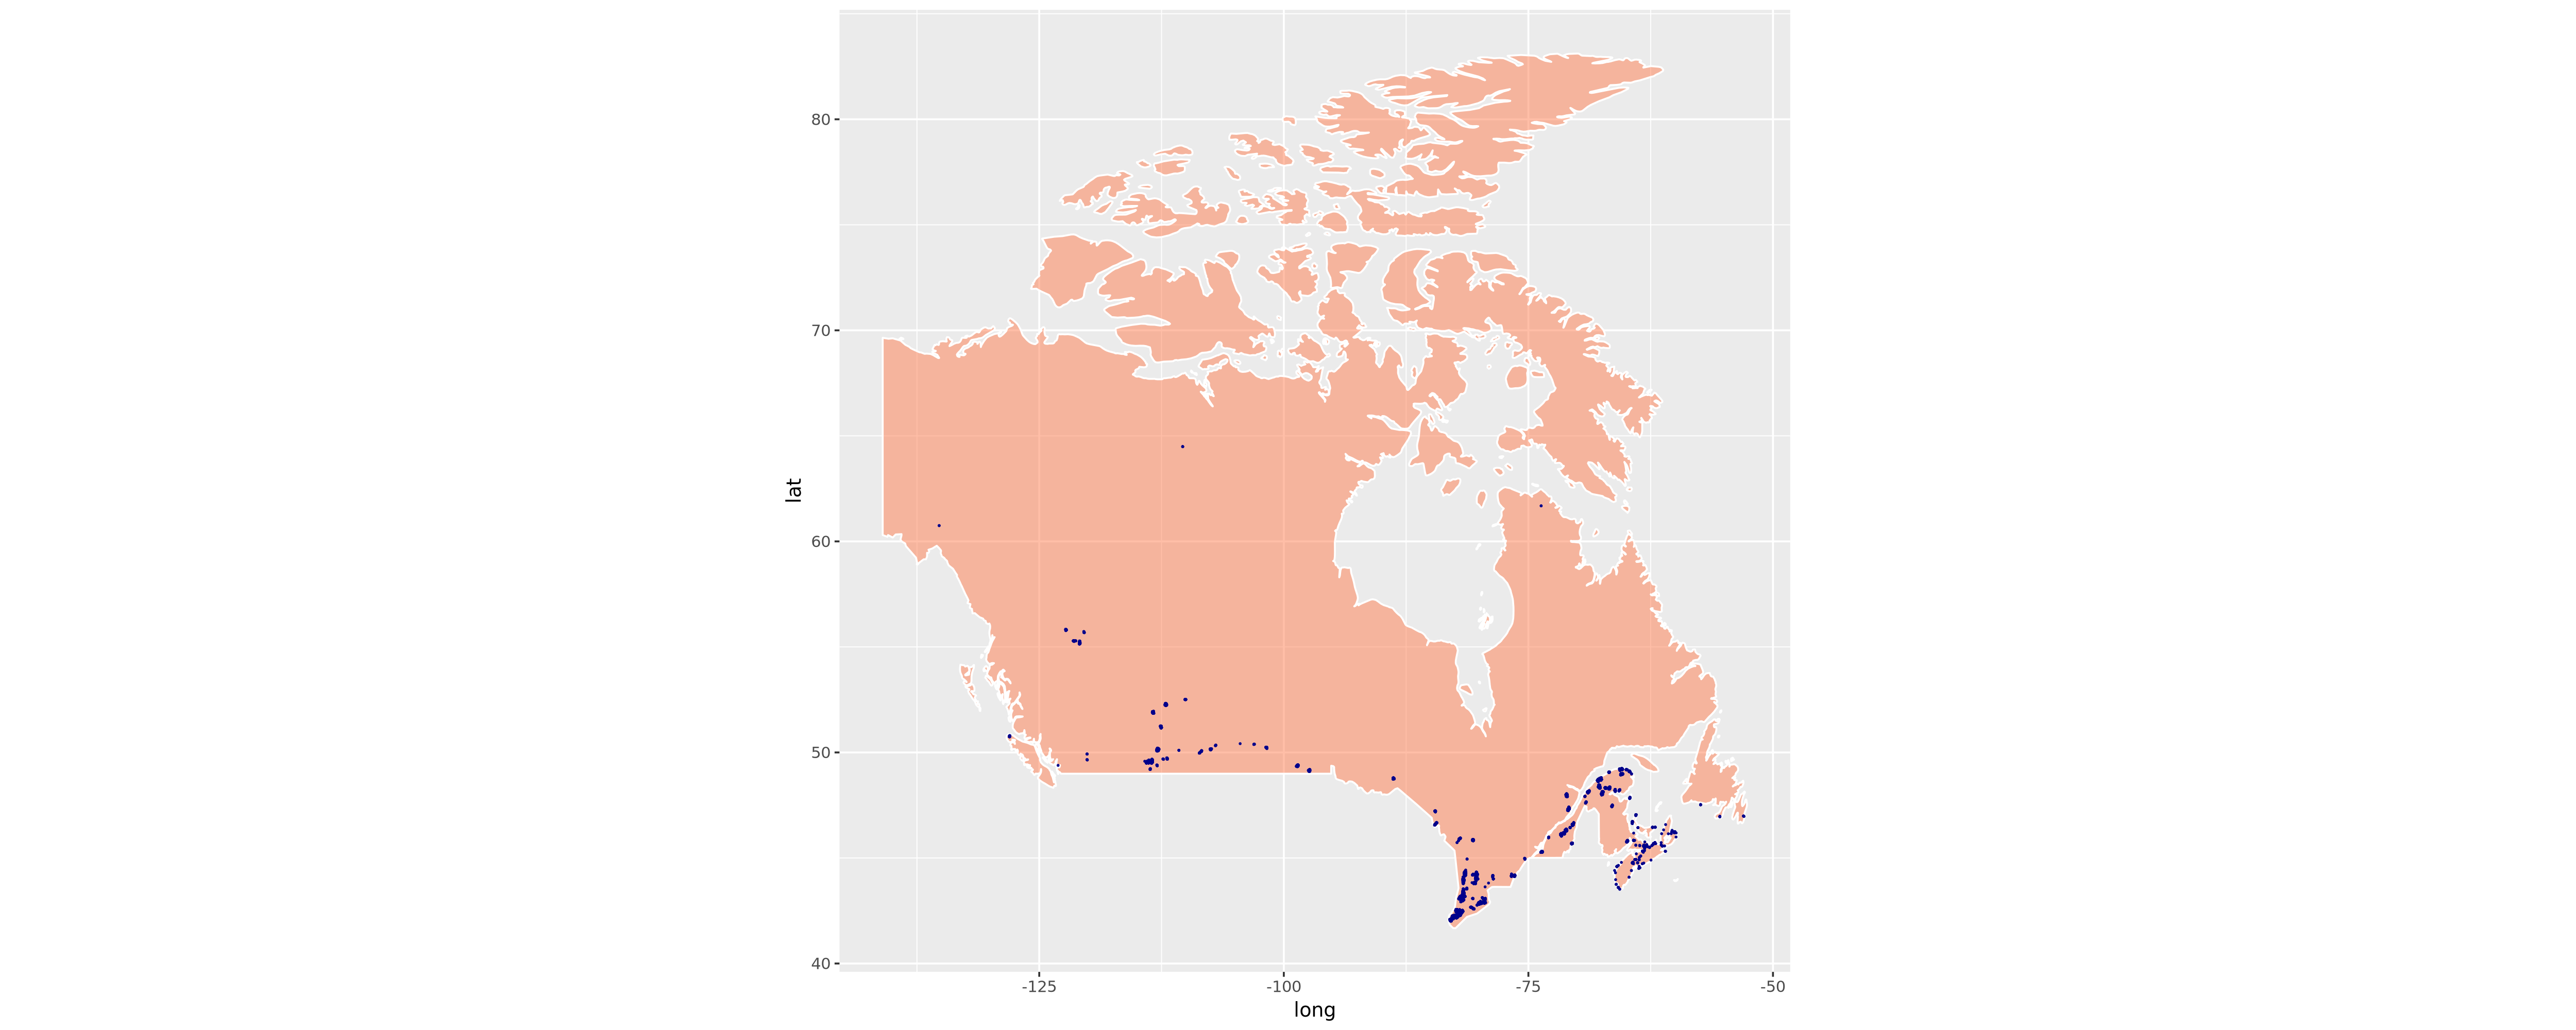

In [25]:
# options(repr.plot.res = 250)

ggplot() + 
    geom_polygon(data = canada, aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() + 
    geom_point(data = Wind_Turbine, aes(x = longitude, y = latitude), color = 'dark blue', size = 0.1)